In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [35]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("../input/train.csv", dtype={"Age": np.float64}, )
test_df    = pd.read_csv("../input/test.csv", dtype={"Age": np.float64}, )

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [37]:
import re

def create_title_classes(df):
    df['Mil'] = np.where((df['Name'].str.contains('Capt') | df['Name'].str.contains('Major\.') | df['Name'].str.contains('Col\.') | df['Name'].str.contains('Brig\.') | df['Name'].str.contains('Gen\.')), 1, 0)
    df['Rev'] = np.where(df['Name'].str.contains('Rev'), 1, 0)
    df['Dr'] = np.where(df['Name'].str.contains('Dr\.'), 1, 0) 
    df['Master'] = np.where(df['Name'].str.contains('Master'), 1, 0) 
    df['Mrs'] = np.where(df['Name'].str.contains('Mrs\.') | df['Name'].str.contains('Mme\.'), 1, 0) 
    df['Mr'] = np.where(df['Name'].str.contains('Mr\.') | ((df['Sex'] == 'male') & (df['Dr'] == 0) & (df['Mil'] == 0) & (df['Rev'] == 0) & (df['Master'] == 0)),1,0)
    df['Miss'] = np.where(df['Name'].str.contains('Miss') | ((df['Sex'] == 'female') & (df['Dr'] == 0) & (df['Mrs'] == 0)), 1, 0) 

    print "Number of Mr.: %d " % len(df[df['Mr'] == 1])
    print "Number of Mrs.: %d " % len(df[df['Mrs'] == 1])
    print "Number of Miss: %d " % len(df[df['Miss'] == 1])
    print "Number of Dr.: %d " % len(df[df['Dr'] == 1])
    print "Number of Master: %d " % len(df[df['Master'] == 1])
    print "Number of Reverends: %d " % len(df[df['Rev'] == 1])
    print "Number of Military Officers: %d " % len(df[df['Mil'] == 1])
    print "Total number of people: %d " % len(df)

    
create_title_classes(titanic_df)
create_title_classes(test_df)

Number of Mr.: 520 
Number of Mrs.: 126 
Number of Miss: 187 
Number of Dr.: 7 
Number of Master: 40 
Number of Reverends: 6 
Number of Military Officers: 5 
Total number of people: 891 
Number of Mr.: 240 
Number of Mrs.: 72 
Number of Miss: 80 
Number of Dr.: 1 
Number of Master: 21 
Number of Reverends: 2 
Number of Military Officers: 2 
Total number of people: 418 


In [38]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Mil,Rev,Dr,Master,Mrs,Mr,Miss,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,0,0,0,0,0,1,0,0.0,0.0
1,1,1,female,38.0,1,0,71.2833,C85,0,0,0,0,1,0,0,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0,0,0,0,0,1,0.0,0.0
3,1,1,female,35.0,1,0,53.1000,C123,0,0,0,0,1,0,0,0.0,0.0
4,0,3,male,35.0,0,0,8.0500,NaN,0,0,0,0,0,1,0,0.0,0.0


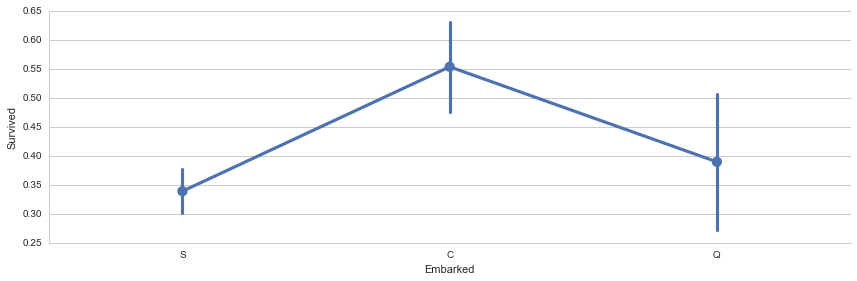

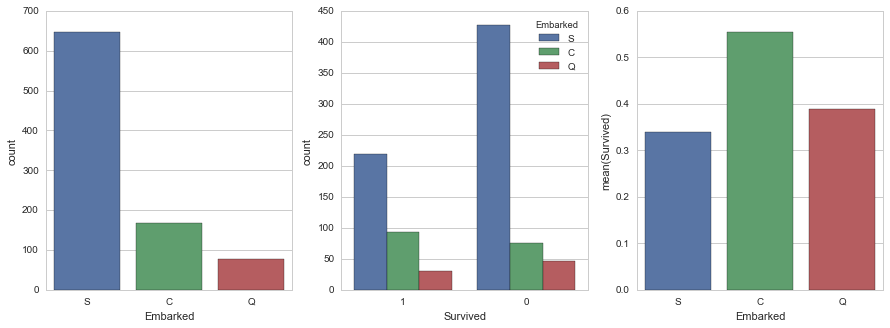

In [39]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

titanic_df.head()

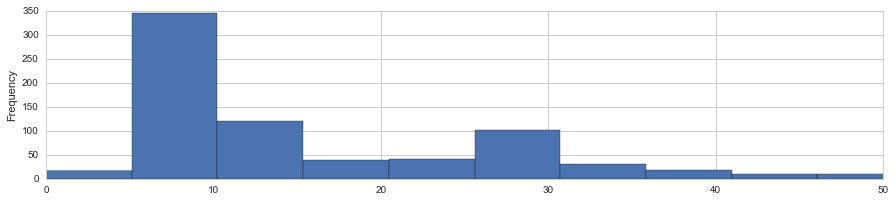

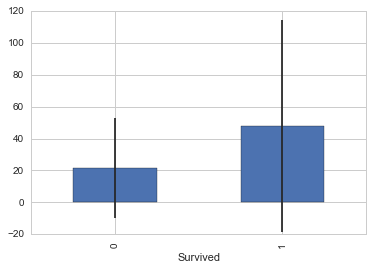

In [40]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

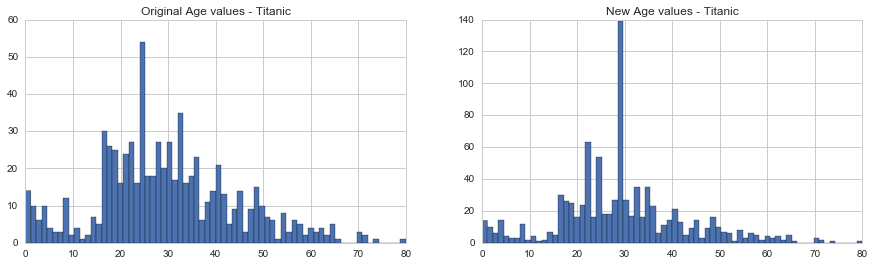

In [41]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

median_age_mr = pd.concat([titanic_df[titanic_df['Mr']==1],test_df[test_df['Mr']==1]])['Age'].median()
titanic_df.loc[(titanic_df['Mr']==1) & (np.isnan(titanic_df["Age"])),"Age"] = median_age_mr
test_df.loc[(test_df['Mr']==1) & (np.isnan(test_df["Age"])),"Age"] = median_age_mr

median_age_miss = pd.concat([titanic_df[titanic_df['Miss']==1],test_df[test_df['Miss']==1]])['Age'].median()
titanic_df.loc[(titanic_df['Miss']==1) & (np.isnan(titanic_df["Age"])),"Age"] = median_age_miss
test_df.loc[(test_df['Miss']==1) & (np.isnan(test_df["Age"])),"Age"] = median_age_miss

median_age_mrs = pd.concat([titanic_df[titanic_df['Mrs']==1],test_df[test_df['Mrs']==1]])['Age'].median()
titanic_df.loc[(titanic_df['Mrs']==1) & (np.isnan(titanic_df["Age"])),"Age"] = median_age_mrs
test_df.loc[(test_df['Mrs']==1) & (np.isnan(test_df["Age"])),"Age"] = median_age_mrs

median_age_rev = pd.concat([titanic_df[titanic_df['Rev']==1],test_df[test_df['Rev']==1]])['Age'].median()
titanic_df.loc[(titanic_df['Rev']==1) & np.isnan(titanic_df["Age"]),"Age"] = median_age_rev
test_df.loc[(test_df['Rev']==1) & (np.isnan(test_df["Age"])),"Age"] = median_age_rev

median_age_dr = pd.concat([titanic_df[titanic_df['Dr']==1],test_df[test_df['Dr']==1]])['Age'].median()
titanic_df.loc[(titanic_df['Dr']==1) & (np.isnan(titanic_df["Age"])),"Age"] = median_age_dr
test_df.loc[(test_df['Dr']==1) & (np.isnan(test_df["Age"])),"Age"] = median_age_dr

median_age_mil = pd.concat([titanic_df[titanic_df['Mil']==1],test_df[test_df['Mil']==1]])['Age'].median()
titanic_df.loc[(titanic_df['Mil']==1) & (np.isnan(titanic_df["Age"])),"Age"] = median_age_mil
test_df.loc[(test_df['Mil']==1) & (np.isnan(test_df["Age"])),"Age"] = median_age_mil

median_age_master = pd.concat([titanic_df[titanic_df['Master']==1],test_df[test_df['Master']==1]])['Age'].median()
titanic_df.loc[(titanic_df['Master']==1) & (np.isnan(titanic_df["Age"])),"Age"] = median_age_master
test_df.loc[(test_df['Master']==1) & (np.isnan(test_df["Age"])),"Age"] = median_age_master

# convert from float to int
#print titanic_df['Age']
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

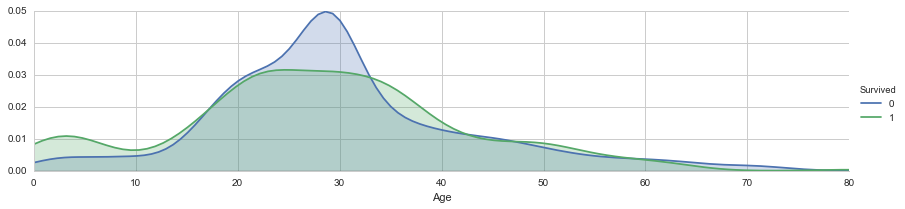

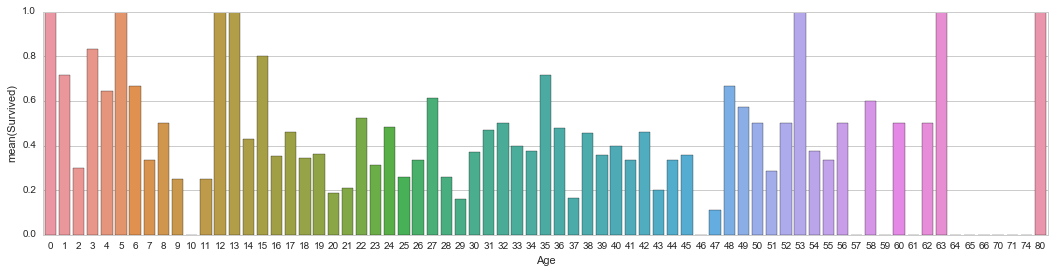

In [42]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [43]:
def extract_cabin_features(df):
    df['Cabin'].fillna('cabZ', inplace=True)
    df.loc[df['Cabin'].str.contains('A'),'Cabin'] = 'cabA'
    df.loc[df['Cabin'].str.contains('B'),'Cabin'] = 'cabB'
    df.loc[df['Cabin'].str.contains('C'),'Cabin'] = 'cabC'
    df.loc[df['Cabin'].str.contains('D'),'Cabin'] = 'cabD'
    df.loc[df['Cabin'].str.contains('E'),'Cabin'] = 'cabE'
    df.loc[df['Cabin'].str.contains('G'),'Cabin'] = 'cabG'
    df.loc[df['Cabin'].str.contains('F'),'Cabin'] = 'cabF'
    df.loc[df['Cabin'].str.contains('T'),'Cabin'] = 'cabZ'
    
    cabin_dummies = pd.get_dummies(df['Cabin'])
    cabin_dummies.drop(['cabZ'], axis=1, inplace=True)
    df = df.join(cabin_dummies)
    df.drop(['Cabin'], axis=1, inplace=True)
    
    return df

#titanic_df = extract_cabin_features(titanic_df)
#test_df = extract_cabin_features(test_df)

print titanic_df.head()
print test_df.head()
    
    
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

#titanic_df.drop("Sex",axis=1,inplace=True)
#test_df.drop("Sex",axis=1,inplace=True)

# Dropping Sex as well as this is entirely accounted for in various titles
gender_dummies_titanic  = pd.get_dummies(titanic_df['Sex'])
gender_dummies_titanic.drop(['male'], axis=1, inplace=True)

gender_dummies_test  = pd.get_dummies(test_df['Sex'])
gender_dummies_test.drop(['male'], axis=1, inplace=True)

titanic_df = titanic_df.join(gender_dummies_titanic)
test_df    = test_df.join(gender_dummies_test)

titanic_df.drop(['Sex'], axis=1,inplace=True)
test_df.drop(['Sex'], axis=1,inplace=True)

   Survived  Pclass     Sex  Age  SibSp  Parch  Fare Cabin  Mil  Rev  Dr  \
0         0       3    male   22      1      0     7   NaN    0    0   0   
1         1       1  female   38      1      0    71   C85    0    0   0   
2         1       3  female   26      0      0     7   NaN    0    0   0   
3         1       1  female   35      1      0    53  C123    0    0   0   
4         0       3    male   35      0      0     8   NaN    0    0   0   

   Master  Mrs  Mr  Miss    C    Q  
0       0    0   1     0  0.0  0.0  
1       0    1   0     0  1.0  0.0  
2       0    0   0     1  0.0  0.0  
3       0    1   0     0  0.0  0.0  
4       0    0   1     0  0.0  0.0  
   PassengerId  Pclass     Sex  Age  SibSp  Parch  Fare Cabin  Mil  Rev  Dr  \
0          892       3    male   34      0      0     7   NaN    0    0   0   
1          893       3  female   47      1      0     7   NaN    0    0   0   
2          894       2    male   62      0      0     9   NaN    0    0   0   
3    

[<matplotlib.text.Text at 0x11e720410>, <matplotlib.text.Text at 0x11e7391d0>]

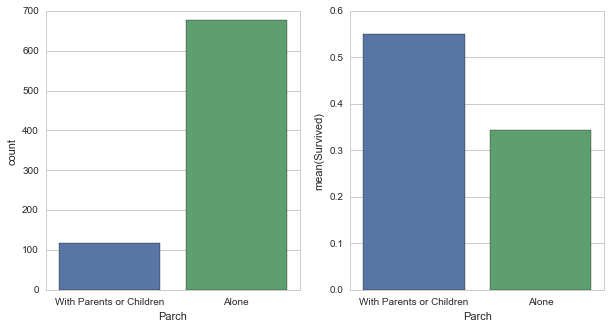

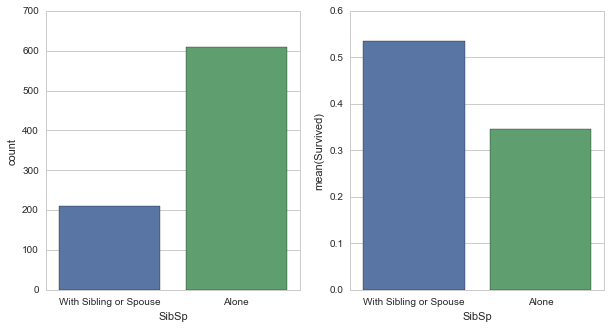

In [44]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
#titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
#titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
#titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

#test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
#test_df['Family'].loc[test_df['Family'] > 0] = 1
#test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
#titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
#test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Parch', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
parch_perc = titanic_df[["Parch", "Survived"]].groupby(['Parch'],as_index=False).mean()
sns.barplot(x='Parch', y='Survived', data=parch_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Parents or Children","Alone"], rotation=0)

fig2, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='SibSp', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
sibsp_perc = titanic_df[["SibSp", "Survived"]].groupby(['SibSp'],as_index=False).mean()
sns.barplot(x='SibSp', y='Survived', data=sibsp_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Sibling or Spouse","Alone"], rotation=0)

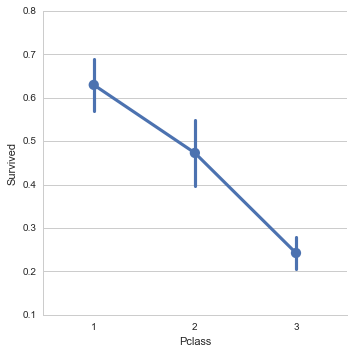

In [45]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [46]:
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

accuracy_scorer = make_scorer(accuracy_score)

# Random Forests

random_forest = RandomForestClassifier(max_depth=6,n_estimators=50,min_samples_split=14,criterion='gini')

#random_forest.fit(X_train, Y_train)

parameters = {'max_depth':[6], 'min_samples_split':[14], 'n_estimators':[50], 'criterion':['gini','entropy']}
grid_search_CV = GridSearchCV(random_forest, parameters, cv=40, scoring=accuracy_scorer, verbose=10)
grid_search_CV.fit(X_train, Y_train)
print("score equals %f" % (grid_search_CV.best_score_))
print("%s" % (grid_search_CV.best_params_))
random_forest = grid_search_CV.best_estimator_

Y_pred_rf = random_forest.predict(X_test)

rf_score = random_forest.score(X_train, Y_train)

print(rf_score)

Fitting 40 folds for each of 2 candidates, totalling 80 fits
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.869565 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.1s


[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.652174 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.956522 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.869565 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 


[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.4s


[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.782609 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.869565 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.826087 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.913043 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.782609 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 


[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.7s


[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.826087 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.826087 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.652174 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.826087 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 


[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    1.3s


[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.869565 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.956522 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.913043 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.913043 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 


[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    1.9s


[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.739130 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.782609 -   0.2s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.826087 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.869565 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.782609 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.818182 -   0.1s
[CV] min_samples_split=14, n_estimators=50, cri

[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    2.8s


[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.772727 -   0.2s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.818182 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.863636 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.727273 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.809524 -   0.2s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.714286 -   0.1s
[CV] min_samples_split=14, n_estimators=50, cri

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    3.7s


[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.809524 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.761905 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.904762 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.904762 -   0.3s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.809524 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=gini, max_depth=6, score=0.904762 -   0.1s
[CV] min_samples_split=14, n_estimators=50, cri

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    5.0s


[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.652174 -   0.2s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.956522 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.869565 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.739130 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.869565 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.869565 -   0.2s
[CV] min_sampl

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    6.1s


[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.826087 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.826087 -   0.2s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.652174 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.826087 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.869565 -   0.2s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.956522 -   0.2s
[CV] min_sampl

[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:    7.7s


[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.782609 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.818182 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.818182 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.772727 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.772727 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.818182 -   0.1s
[CV] min_sampl

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:    8.9s


[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.809524 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.761905 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.904762 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.904762 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.809524 -   0.1s
[CV] min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6 
[CV]  min_samples_split=14, n_estimators=50, criterion=entropy, max_depth=6, score=0.904762 -   0.1s
[CV] min_sampl

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    9.8s finished


In [48]:
# put ensemble together
#total_score = knn_score + rf_score + svc_score + logreg_score

#Y_pred_avg = (1./5.) * Y_pred_knn + (1./5.) * Y_pred_rf + (0.35) * Y_pred_svc + (0.25) * Y_pred_ab
Y_pred_avg = Y_pred_rf
#Y_pred_avg = Y_pred_svc
#Y_pred_avg = Y_pred_knn
#Y_pred_avg = Y_pred_ab
Y_pred = list(map(lambda x: 0 if x < 0.5 else 1, Y_pred_avg))

In [49]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

# PCA

In [50]:
X_train.head()

,Age,SibSp,Parch,Fare,Mil,Rev,Dr,Master,Mrs,Mr,Miss,C,Q,female,Class_1,Class_2
0,22,1,0,7,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
1,38,1,0,71,0,0,0,0,1,0,0,1.0,0.0,1.0,1.0,0.0
2,26,0,0,7,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
3,35,1,0,53,0,0,0,0,1,0,0,0.0,0.0,1.0,1.0,0.0
4,35,0,0,8,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0


In [87]:
import numpy as np
import scipy.linalg as l
from sklearn.preprocessing import MinMaxScaler

X = X_train.as_matrix().astype(np.float32)
Y = Y_train.as_matrix().astype(np.float32)

scaler = MinMaxScaler()
Xscale = scaler.fit_transform(X)
means = np.mean(Xscale, axis=0)
Xscale_means = Xscale - means

Xt = X_test

In [88]:
U, S, Vh = la.svd(X)
Uscale, Sscale, Vhscale = la.svd(Xscale)
Uscale_means, Sscale_means, Vhscale_means = la.svd(Xscale_means)


print Sscale
print
print Sscale_means

[ 28.06902313  22.39787483  14.71757889  12.80436516  10.67474747
   9.74475861   7.72865915   6.82078362   4.11950159   3.75302625
   3.06143069   2.5734098    2.3314445    2.10479712   1.88708556
   0.52925247]

[  2.23981895e+01   1.51220598e+01   1.28999100e+01   1.09143171e+01
   9.95231438e+00   8.45063019e+00   7.68631363e+00   4.34403801e+00
   3.86268067e+00   3.08416128e+00   2.97435951e+00   2.52992415e+00
   2.29337096e+00   2.08769226e+00   5.98077118e-01   1.02071090e-06]


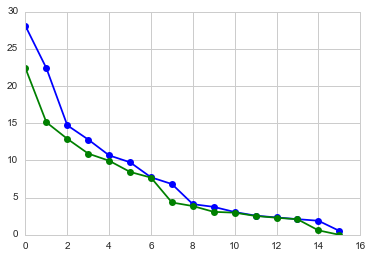

In [89]:
%matplotlib inline

plt.plot(range(16), Sscale, 'bo-', range(16), Sscale_means, 'go-')

In [90]:
T = np.dot(Xscale, Vhscale_means.T)
print T.shape

(891, 16)


In [92]:
Xtest = X_test.as_matrix().astype(np.float32)
Xtestscale = scaler.fit_transform(Xtest)
Xtestscalemeans = Xtestscale - means

Ttest = np.dot(Xtestscalemeans, Vhscale_means.T)

print Ttest.shape

(418, 16)


---

# Neural Network Approach

---

Using the "munged data", train a 1-hidden layer neural network to classify passenger survivability. The neural network is much simpler due to the fact that the classification is binary.

## Step 1 - Obtain Data

Obtain data in the form of Numpy arrays. Coerce to `float32`. (Tensforflow assumes parameters are continuous.)

* `M` = number of entries
* `N` = number of features per entry

In [93]:
import numpy as np
import tensorflow as tf

# X - 891 x 23 input training matrix
#
X = T #X_train.as_matrix().astype(np.float32)
Y = Y_train.as_matrix().astype(np.float32)
Xt = X_test.as_matrix().astype(np.float32)

M, N = X.shape
Mt, Nt = Xt.shape
Y.resize(M,1)

print 'X:', X.shape
print 'Y:', Y.shape
print '\nXt:', Xt.shape

X: (891, 16)
Y: (891, 1)

Xt: (418, 16)


In [94]:
print X[:5]
print
print Y[:5].T

[[ 0.63087207  0.08187343 -0.02939525 -0.06338193  0.09849602  0.4736321
  -0.09927078 -0.30904746  0.11059391 -0.09761871  0.35424399  0.09186738
   0.07270409  0.03892854  0.192643    0.37796453]
 [-0.97224164  1.2438221   0.95207238 -0.19864504 -0.09489375  0.54819506
   0.21732692 -0.26842532  0.07263391 -0.07631661  0.42968711  0.08027545
   0.07764679  0.07581484  0.1913497   0.3779645 ]
 [-1.00366378 -0.03186619 -0.48754016 -0.21155559  0.21874687  0.53462851
  -0.2233277  -0.08088714  0.13193911 -0.20809871  0.40241954  0.11542627
   0.09358972  0.03446233  0.19007128  0.37796441]
 [-0.91272128  0.77957302  0.81441784  0.45141578  0.46707976  0.49114305
   0.08452109 -0.27482811  0.00457146 -0.07097106  0.40608531  0.07988133
   0.07642654  0.08425795  0.18894006  0.3779645 ]
 [ 0.64063424  0.0995899  -0.00717869 -0.06275831  0.12713689  0.53985065
  -0.08478642 -0.17694031  0.16910298 -0.21099558  0.38214853  0.11394572
   0.09436914  0.02309051  0.19182968  0.3779645 ]]

[[ 0

## Step 2 - Construct NN

We will create a single-hidden-layer NN with `K` features. Based on what I've read, many simple problems can be reasonable solved using only one hidden layer. One hyper-parameter that needs to be adjusted, though, is the number of "features" in the hidden layer. Rule of thumb is that it's somewhere between the number of inputs and the number of outputs.

* Number of inputs = 23 (per datum)
* Number of outputs = 1 (per datum)

**Aside:** Multiple layers are necessary in some image analysis. For example, a convolutional layer is appled to resolve position-independent features. These data in the Titanic problem doesn't really fit the convolutional image models so starting at a single hidden-layer seems reasonable.

The output of the NN is $y = y(x)$ whose range is $[0,1]$ - the two classes we wish to determine for each entry, $x$.

In [95]:
tf.reset_default_graph()

# "variable" holding the input data
#
# in TF a "tf.placeholder" represents a variable where data
# will be provided by the user whereas a "tf.Variable" is 
# a value that is to be determined by the model
#
x = tf.placeholder(tf.float32, [None, N], name='Passengers')
y_ = tf.placeholder(tf.float32, [None, 1], name='Survival')

# number of hidden layer features
#
K1 = 32
K2 = 16

# Input -> Hidden Layer #1
#
# * input data: M x N
# * weight matrix: N x K
# * bias vector: K
#
# * a1 = (MxN) . (NxK) + (K) = (MxK) + (K)
#
# (note that vector addition is distributed over each row)
#
W1 = tf.Variable(tf.random_normal([N,K1]), name='Layer1Weights')
b1 = tf.Variable(tf.random_normal([K1]), name='Layer1Bias')
a1 = tf.nn.sigmoid(tf.matmul(x,W1) + b1)

# Hidden Layer #1 -> Hidden Layer #2
W2 = tf.Variable(tf.random_normal([K1,K2]), name='Layer2Weights')
b2 = tf.Variable(tf.random_normal([K2]), name='Layer2Bias')
a2 = tf.nn.sigmoid(tf.matmul(a1,W2) + b2)

# Hidden Layer #2 -> Output Layer
W3 = tf.Variable(tf.random_normal([K2,1]), name='Layer3Weights')
b3 = tf.Variable(tf.random_normal([1]), name='Layer3Bias')
a3 = tf.nn.sigmoid(tf.matmul(a2,W3) + b3)

y = a3

In [96]:
print 'x: ', x.get_shape()

print '\nLayer #1'
print 'W1:', W1.get_shape()
print 'b1:', b1.get_shape()
print 'a1:', a1.get_shape()

print '\nLayer #2'
print 'W2:', W2.get_shape()
print 'b2:', b2.get_shape()
print 'a2:', a2.get_shape()

print '\nLayer #3'
print 'W3:', W3.get_shape()
print 'b3:', b3.get_shape()
print 'a3:', a3.get_shape()

print '\ny: ', y.get_shape()

x:  (?, 16)

Layer #1
W1: (16, 32)
b1: (32,)
a1: (?, 32)

Layer #2
W2: (32, 16)
b2: (16,)
a2: (?, 16)

Layer #3
W3: (16, 1)
b3: (1,)
a3: (?, 1)

y:  (?, 1)


## Step 3 - Determine Error function and Optimizer

We want to compare the output, $y = y(x)$, with the know classification represented by the placeholder `y_`. TensorFlow asks that we produce a function which computes the error of the given model. It will try to minimize the error by adjusting all of the parameters. (The weights matrices `W_i` and bias vectors `b_i`).

For starters, we will compute the $l_2$ norm of the difference between the predicted class `y` and the known class `y_`. From my experience it's worth experimenting with other error functions.

There is also some experimentation in choosing an optimizer. `GradientDescentOptimizer` and `ADAMOptimizer` are two standard choices.

In [97]:
# error function and optimizer
#

#error = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), 1))
error = tf.reduce_sum(tf.squared_difference(y, y_))
train_step = tf.train.AdamOptimizer().minimize(error)

# functions for determining accuracy. we will use a straigt-up cutoff
# for final classification. that is, if y<0.5 then set y=0 (died).
# if y >= 0.5 then set y=1.0 (survived). count the number of correct
# predictions
#
is_correct = tf.equal(tf.round(y),tf.round(y_))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [98]:
init = tf.initialize_all_variables()

In [99]:
print 'y:         ', y.get_shape()
print 'y_:        ', y_.get_shape()
print '*error:    ', error.get_shape()
print 'is_correct:', is_correct.get_shape()
print '*accuracy: ', accuracy.get_shape()

y:          (?, 1)
y_:         (?, 1)
*error:     ()
is_correct: (?, 1)
*accuracy:  ()


## Step 4 - Train!

Take a bunch of optimizer steps to try and minimize the error.

In [100]:
# training parameters
#
LOG_ITER = 10000  # log every LOG_ITER iterations
MAX_ITER = 150000
iter_count = 0

with tf.Session() as sess:
    sess.run(init)
    
    print '= Training ='
    while iter_count < MAX_ITER:
        # run the optimization step with the input data X and Y
        #
        indices = np.random.random_integers(0, M-1, size=96)
        batch_T = T[indices,:]
        batch_Y = Y[indices]
        sess.run(train_step, feed_dict={x:batch_T, y_:batch_Y})
        
        # log progress every couple of iterations
        #
        if (iter_count % LOG_ITER) == 0:
            # compute current error and accuracy
            #
            current_error, current_accuracy = sess.run(
                [error, accuracy], feed_dict={x:T, y_:Y})
            
            print 'Iteration {0} - Accuracy = {1}, Error = {2}'.format(
                iter_count, current_accuracy, current_error
            )
            
        iter_count += 1
            
    current_accuracy = accuracy.eval(session=sess, feed_dict={x:T, y_:Y})
    print '\n= Results ='
    print 'Final Accuracy (Training Set) = {0}'.format(current_accuracy)
    
    # apply the trained model to the test data
    #
    # * round the results of y
    #
    print '\n= Test Data ='
    classification = tf.round(y)
    Yt = classification.eval(session=sess, feed_dict={x:Ttest})
    print Yt[:5]


= Training =
Iteration 0 - Accuracy = 0.383838385344, Error = 490.401245117
Iteration 10000 - Accuracy = 0.852974176407, Error = 100.74861908
Iteration 20000 - Accuracy = 0.850729525089, Error = 97.9033966064
Iteration 30000 - Accuracy = 0.854096531868, Error = 94.5176696777
Iteration 40000 - Accuracy = 0.867564558983, Error = 88.6529541016
Iteration 50000 - Accuracy = 0.872053861618, Error = 85.6018829346
Iteration 60000 - Accuracy = 0.879910230637, Error = 82.1906814575
Iteration 70000 - Accuracy = 0.883277237415, Error = 79.3615646362
Iteration 80000 - Accuracy = 0.883277237415, Error = 76.9470596313
Iteration 90000 - Accuracy = 0.887766540051, Error = 75.2459335327
Iteration 100000 - Accuracy = 0.890011250973, Error = 73.5480041504
Iteration 110000 - Accuracy = 0.887766540051, Error = 71.5936889648
Iteration 120000 - Accuracy = 0.894500553608, Error = 70.1193161011
Iteration 130000 - Accuracy = 0.897867560387, Error = 69.4842681885
Iteration 140000 - Accuracy = 0.900112211704, Erro

In [104]:
Yt = Yt.T[0].astype(np.int)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Yt
    })
submission.to_csv('~/Desktop/titanic.csv', index=False)

(418,)
